# Task 1: Motion Estimation and Event Detection in a Video

Objective:

Detect motion and specific events in a video using frame differencing or optical flow to estimate motion and identify events without machine learning.

1. Load the Video

First, we'll load the video using OpenCV and extract frames one by one.

In [1]:
import cv2

# Load video file
video_path = "C:\\Users\\Narthana\\Downloads\WhatsApp Video 2024-10-22 at 21.50.30_6f36eee3.mp4"  
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video file")


2. Convert Frame to Grayscale

We will convert each frame to grayscale to simplify the analysis, as color information is not necessary for detecting motion.

In [2]:
# Read the first frame
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY) if ret else None

3. Frame Differencing (Histogram Comparison)

Frame differencing will help us detect motion by comparing the current frame with the previous one. We’ll use histogram comparison to quantify the difference between frames and detect motion.

In [3]:
# Initialize variables
motion_threshold = 0.3  # Set motion threshold for event detection
event_frames = []  # To store frames where events are detected
frame_count = 0  # Track frame number

while True:
    # Capture next frame
    ret, curr_frame = cap.read()
    
    if not ret:
        break  # Break loop when video ends
    
    # Convert current frame to grayscale
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)
    
    # Compute absolute difference between current and previous frame
    diff_frame = cv2.absdiff(prev_gray, curr_gray)

    # Compute histogram difference
    hist_diff = cv2.compareHist(
        cv2.calcHist([prev_gray], [0], None, [256], [0, 256]),
        cv2.calcHist([curr_gray], [0], None, [256], [0, 256]),
        cv2.HISTCMP_CORREL
    )

    # Mark frames with significant motion
    if hist_diff < motion_threshold:
        event_frames.append((frame_count, curr_frame))  # Store frame number and image

    # Update previous frame for next iteration
    prev_gray = curr_gray
    frame_count += 1

cap.release()


4. Event Detection Based on Motion Intensity

We'll define an event based on motion intensity by setting a threshold for the frame histogram difference.

In [4]:
# Set threshold to detect events based on motion intensity
motion_events = []
for frame_num, frame in event_frames:
    # If the difference is significant, we detect an event
    motion_events.append((frame_num, frame))
    print(f"Event detected at frame {frame_num}")

Event detected at frame 67
Event detected at frame 230
Event detected at frame 319
Event detected at frame 380
Event detected at frame 402
Event detected at frame 510


5. Visualize and Annotate Events

Once motion events are detected, we’ll mark the frames where the events occurred and show them with the timestamp.

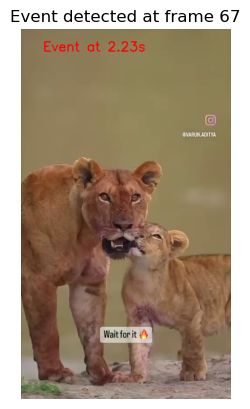

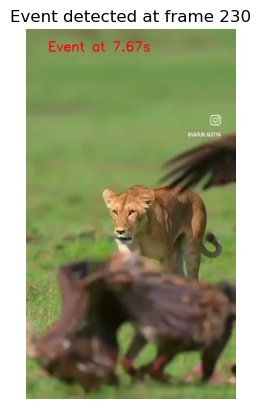

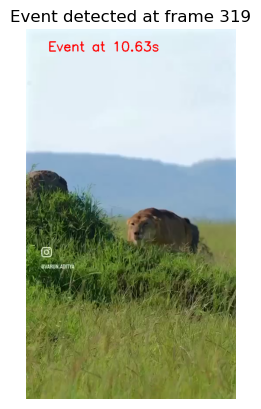

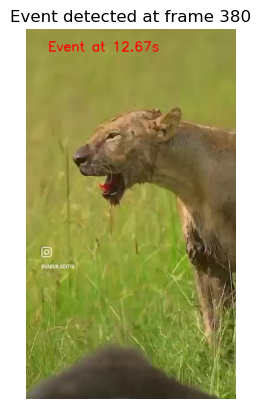

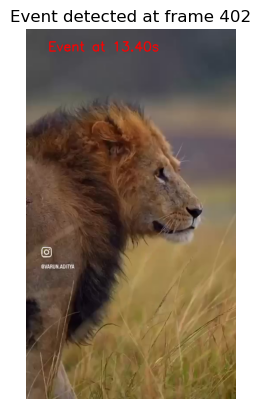

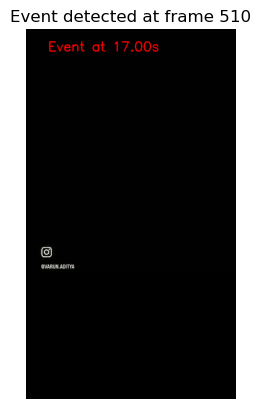

In [6]:
import matplotlib.pyplot as plt
# Retrieve the FPS (frames per second) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# If fps is 0, set a default frame rate (e.g., 30 FPS)
if fps == 0:
    fps = 30  # Assume a default frame rate of 30 FPS if not available

# Function to show frames with detected motion events
def visualize_events(events):
    for event in events:
        frame_num, frame = event
        timestamp = frame_num / fps  # Calculate timestamp using corrected fps
        cv2.putText(frame, f"Event at {timestamp:.2f}s", (50, 50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Event detected at frame {frame_num}")
        plt.axis('off')
        plt.show()

# Call the visualization function
visualize_events(motion_events)

# Task 2: Estimating Sentiments of People in a Crowd – Gesture Analysis and Image Categorization

Objective:
Estimate the sentiments of individuals in a crowd using basic gesture analysis techniques, such as detecting facial expressions or hand gestures, without using machine learning models.

1. Load Image Set

We will load the set of images using OpenCV.

Image loaded successfully!


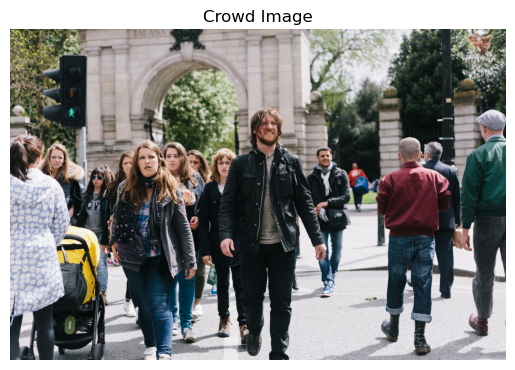

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:\\Users\\Narthana\\Downloads\\_MG_9597.jpg")

# Check if the image is loaded properly
if image is not None:
    print("Image loaded successfully!")
else:
    print("Error loading image.")

# Convert to RGB for display using matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title('Crowd Image')
plt.axis('off')
plt.show()



2. Preprocessing

We need to perform face detection and hand gesture detection using basic techniques.

Face Detection using Skin-Color-Based Detection

We can use a color threshold in the HSV (Hue, Saturation, Value) color space to detect skin tones.

A simple approach for detecting hand gestures would involve detecting contours that match the expected shape of hands or using similar thresholding.

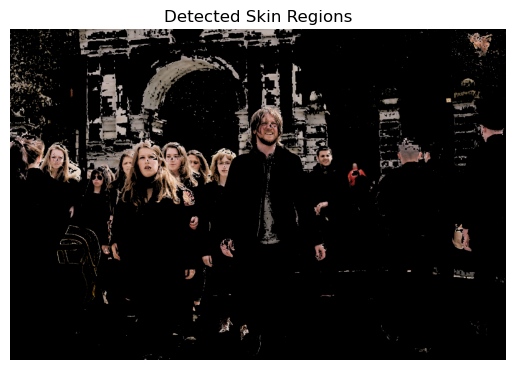

In [22]:
def skin_color_detection(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the bounds
    mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply the mask to extract skin regions
    skin = cv2.bitwise_and(image, image, mask=mask)

    return skin

# Apply skin detection
skin_regions = skin_color_detection(image)

# Display detected skin regions
plt.imshow(cv2.cvtColor(skin_regions, cv2.COLOR_BGR2RGB))
plt.title('Detected Skin Regions')
plt.axis('off')
plt.show()


Step 2: Face and Feature Detection for All Faces in the Crowd
    
We will modify the code to detect multiple faces, extract features (eyes and mouth) for each face, and classify the emotion of each individual.

Number of faces detected: 10


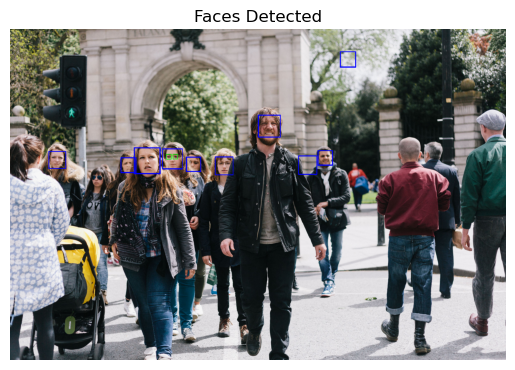

In [36]:
# Load pre-trained Haar Cascade Classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

def detect_faces_and_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    detected_faces = []
    for (x, y, w, h) in faces:
        # Draw rectangle around each face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Focus on face region for detecting eyes and mouth
        face_region = gray[y:y+h, x:x+w]
        color_face_region = image[y:y+h, x:x+w]
        
        # Detect eyes
        eyes = eye_cascade.detectMultiScale(face_region)
        # Detect mouth (smile)
        mouth = mouth_cascade.detectMultiScale(face_region, 1.7, 22)

        # Append face features (eyes and mouth) for later emotion classification
        detected_faces.append((eyes, mouth))

    return detected_faces

# Detect all faces and their features (eyes and mouth)
faces_features = detect_faces_and_features(image)

# Print how many faces were detected
print(f"Number of faces detected: {len(faces_features)}")

# Display the image with rectangles around detected faces
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Faces Detected')
plt.axis('off')
plt.show()


Step 3: Classify Emotion for Each Face
    
For each detected face, we classify emotions based on the presence of a smile (mouth) and print the result for each individual.

Step 4: Overall Sentiment Calculation
    
Once all emotions are detected, we'll calculate the overall sentiment based on the majority emotion.

In [32]:
# Classify emotions for all detected faces using refined rules
emotions = []
for eyes, mouth in faces_features:
    emotion = classify_emotion(eyes, mouth)
    emotions.append(emotion)

# Print detected emotions for each person
for i, emotion in enumerate(emotions, 1):
    print(f"Person {i}: {emotion}")


No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
Narrow eyes detected. Classifying as annoyed.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
Narrow eyes detected. Classifying as annoyed.
No smile detected. Checking eyes for other emotions.
Narrow eyes detected. Classifying as annoyed.
No smile detected. Checking eyes for other emotions.
Narrow eyes detected. Classifying as annoyed.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
Narrow eyes detected. Classifying as annoyed.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
Person 1: neutral
Person 2: annoyed

In [34]:
def categorize_crowd(emotions):
    # Count each emotion
    happy_count = emotions.count('happy')
    sad_count = emotions.count('sad')
    annoyed_count = emotions.count('annoyed')
    neutral_count = emotions.count('neutral')

    # Determine majority sentiment based on counts
    if happy_count > sad_count and happy_count > annoyed_count and happy_count > neutral_count:
        print("Majority of the crowd is happy.")
        return 'Majority Happy'
    elif sad_count > happy_count and sad_count > annoyed_count and sad_count > neutral_count:
        print("Majority of the crowd is sad.")
        return 'Majority Sad'
    elif annoyed_count > happy_count and annoyed_count > sad_count and annoyed_count > neutral_count:
        print("Majority of the crowd is annoyed.")
        return 'Majority Annoyed'
    elif neutral_count > happy_count and neutral_count > sad_count and neutral_count > annoyed_count:
        print("Majority of the crowd is neutral.")
        return 'Majority Neutral'
    else:
        # Handle ties by printing that the sentiment is mixed
        print("Crowd sentiment is mixed.")
        return 'Mixed Sentiment'

# Example output based on the provided counts
overall_sentiment = categorize_crowd(emotions)
print(f'Overall crowd sentiment: {overall_sentiment}')


Crowd sentiment is mixed.
Overall crowd sentiment: Mixed Sentiment


Step 5: Visualize the Results with Annotations

We'll now display the image with the final annotation indicating the overall crowd sentiment.

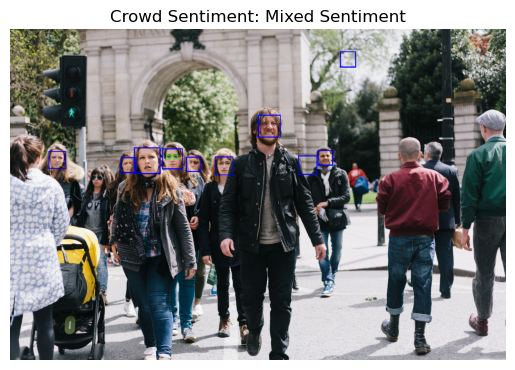

In [37]:
# Display the final image with annotations
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Crowd Sentiment: {overall_sentiment}')
plt.axis('off')
plt.show()


# Task 3: Gender Identification from Facial Features

Objective:

Identify the gender of individuals based on facial features using traditional image processing and feature extraction techniques without using machine learning models.

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load dataset paths
male_folder ="C:\\Users\\Narthana\\Downloads\\archive (1)\\Validation\\male"
female_folder = "C:\\Users\\Narthana\\Downloads\\archive (1)\\Validation\\female"

# Function to load images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load male and female images
male_images = load_images_from_folder(male_folder)
female_images = load_images_from_folder(female_folder)

print(f"Loaded {len(male_images)} male images and {len(female_images)} female images.")


Loaded 5808 male images and 5841 female images.


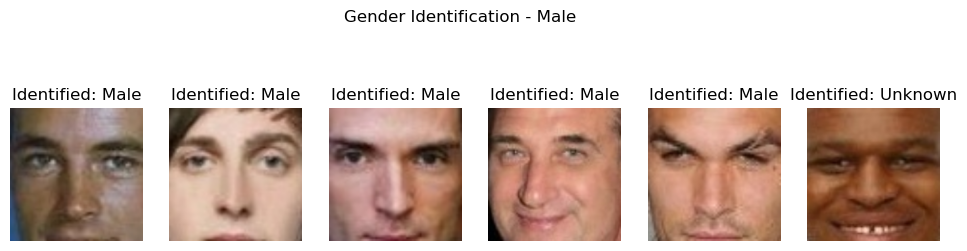

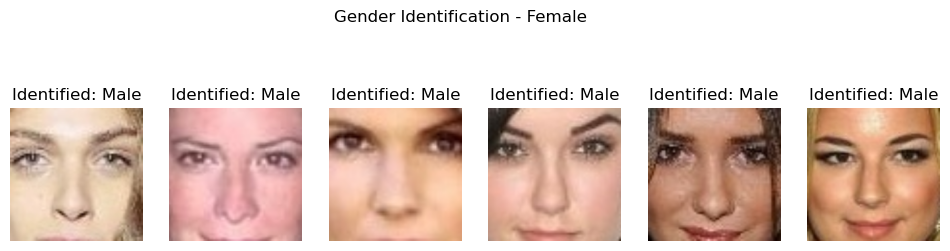

In [8]:
# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Helper function to load all images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load all images from each folder
male_images = load_images_from_folder(male_images_folder)
female_images = load_images_from_folder(female_images_folder)

# Preprocess images: detect and crop faces
def detect_and_crop_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        return cv2.resize(face, (200, 200))  # Resize to a standard size
    return None

# Preprocess all images
def preprocess_images(images):
    cropped_faces = []
    for img in images:
        face = detect_and_crop_face(img)
        if face is not None:
            cropped_faces.append(face)
    return cropped_faces

# Feature Extraction using Sobel Edge Detection for texture-based features
def extract_sobel_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edges = np.sqrt(sobelx ** 2 + sobely ** 2)
    return edges

# Extract geometric features (e.g., distance between eyes)
def extract_geometric_features(face):
    gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(gray, 1.3, 5)
    
    if len(eyes) >= 2:
        eye1, eye2 = eyes[0], eyes[1]
        distance_between_eyes = np.linalg.norm(np.array([eye1[0], eye1[1]]) - np.array([eye2[0], eye2[1]]))
        return distance_between_eyes
    return None

# Rule-Based Gender Identification with Improved Logic
def identify_gender(face):
    # Extract features
    sobel_edges = extract_sobel_edges(face)
    geometric_feature = extract_geometric_features(face)
    
    # Initialize gender prediction
    gender = "Unknown"
    
    # Set thresholds (these may need tuning based on the dataset)
    if geometric_feature is not None:
        if geometric_feature > 85:  # Threshold for wider eye distance
            gender = "Male"
        elif geometric_feature < 24:  # New threshold for closer eyes
            gender = "Female"
    
    # Additional texture-based condition
    if np.sum(sobel_edges) < 1000000:  # Adjust this value to differentiate texture
        gender = "Female"
    
    return gender

# Process all images and collect results for male and female
male_results = []
female_results = []

# Identify genders in the male dataset
for face in preprocess_images(male_images):
    gender = identify_gender(face)
    male_results.append((face, gender))

# Identify genders in the female dataset
for face in preprocess_images(female_images):
    gender = identify_gender(face)
    female_results.append((face, gender))

# Display results for 6 male and 6 female images
def display_results(results, title):
    plt.figure(figsize=(12, 6))
    for i in range(min(6, len(results))):  # Limit to 6 images
        face, gender = results[i]
        plt.subplot(2, 6, i + 1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.title(f"Identified: {gender}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display male and female identification results
display_results(male_results, "Gender Identification - Male")
display_results(female_results, "Gender Identification - Female")